# 6.3 Geographic Visualization 

### 1. Import data and libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file

country_geo = r"C:\Users\ahamr\Desktop\6.1\Original Data\world-countries.json"

In [4]:
# What contents the JSON file:

f = open(r'C:\Users\ahamr\Desktop\6.1\Original Data\world-countries.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [5]:
path = r'C:\Users\ahamr\Desktop\6.1'

In [6]:
# Import the earthquake data

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'data_checked.csv'))

In [7]:
df.head()

,Unnamed: 0,time,latitude,longitude,depth,magnitude,number_stations_reported,gap_between_stations,root_mean_square_amplitude_spectrum,id,place,type,status
0,0,2023-01-01 00:49:25.294000+00:00,52.0999,178.5218,82.770,3.10,14.0,139.0,0.18,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",earthquake,reviewed
1,1,2023-01-01 01:41:43.755000+00:00,7.1397,126.7380,79.194,4.50,32.0,104.0,0.47,us7000j3xk,"23 km ESE of Manay, Philippines",earthquake,reviewed
2,2,2023-01-01 03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,23.0,246.0,0.22,pr2023001000,Puerto Rico region,earthquake,reviewed
3,3,2023-01-01 04:09:32.814000+00:00,-4.7803,102.7675,63.787,4.30,17.0,187.0,0.51,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",earthquake,reviewed
4,4,2023-01-01 04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,19.0,190.0,0.31,us7000j1zd,"59 km SSW of Unalaska, Alaska",earthquake,reviewed


In [8]:
df=df.drop(columns = ['Unnamed: 0'])

In [9]:
df.head()

,time,latitude,longitude,depth,magnitude,number_stations_reported,gap_between_stations,root_mean_square_amplitude_spectrum,id,place,type,status
0,2023-01-01 00:49:25.294000+00:00,52.0999,178.5218,82.770,3.10,14.0,139.0,0.18,us7000j5a1,"Rat Islands, Aleutian Islands, Alaska",earthquake,reviewed
1,2023-01-01 01:41:43.755000+00:00,7.1397,126.7380,79.194,4.50,32.0,104.0,0.47,us7000j3xk,"23 km ESE of Manay, Philippines",earthquake,reviewed
2,2023-01-01 03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,23.0,246.0,0.22,pr2023001000,Puerto Rico region,earthquake,reviewed
3,2023-01-01 04:09:32.814000+00:00,-4.7803,102.7675,63.787,4.30,17.0,187.0,0.51,us7000j3xm,"99 km SSW of Pagar Alam, Indonesia",earthquake,reviewed
4,2023-01-01 04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,19.0,190.0,0.31,us7000j1zd,"59 km SSW of Unalaska, Alaska",earthquake,reviewed


In [10]:
df.shape

(24682, 12)

As the data already contains the 'place' column with a location name, latitude, and longitude it doesn't need a data wrangling procedure. Also, I have done a data consistency check for this dataset in task 6.1.

### 2. Extreme values checks

C:\Users\ahamr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='magnitude', ylabel='Count'>

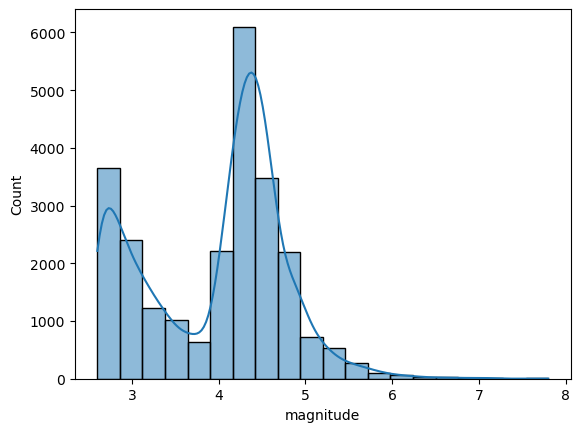

In [11]:
sns.histplot(df['magnitude'], bins=20, kde = True) # shows extreme values for 'magnitude'

C:\Users\ahamr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='depth', ylabel='Count'>

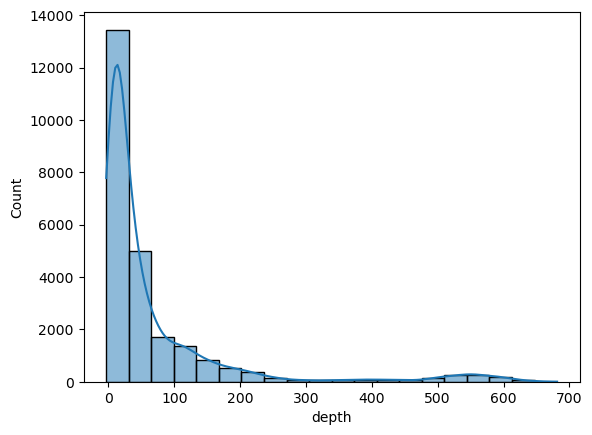

In [12]:
sns.histplot(df['depth'], bins=20, kde = True) # shows extreme values for 'depth'

C:\Users\ahamr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='root_mean_square_amplitude_spectrum', ylabel='Count'>

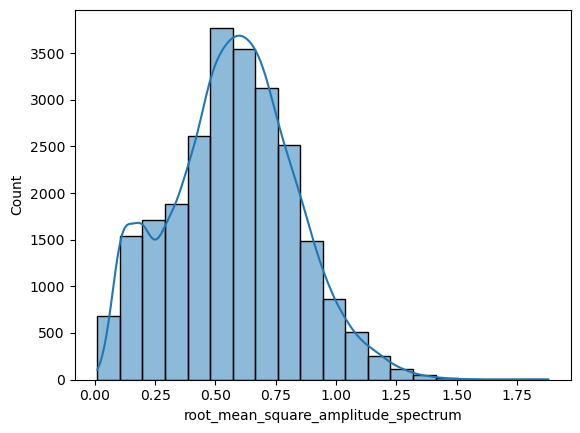

In [13]:
sns.histplot(df['root_mean_square_amplitude_spectrum'], bins=20, kde = True) # shows extreme values for 'root_mean_square_amplitude_spectrum'

### 3. Plotting a choropleth

In [14]:
# Create a data frame with just needed variables

data_to_plot = df[['place','magnitude']]
data_to_plot.head()

,place,magnitude
0,"Rat Islands, Aleutian Islands, Alaska",3.10
1,"23 km ESE of Manay, Philippines",4.50
2,Puerto Rico region,3.93
3,"99 km SSW of Pagar Alam, Indonesia",4.30
4,"59 km SSW of Unalaska, Alaska",3.00


In [15]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['place', 'magnitude'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "magnitude").add_to(map)
folium.LayerControl().add_to(map)

map

In [16]:
map.save('plot_data.html')

In [22]:
# Create a data frame with just needed variables

data_to_plot2 = df[['latitude', 'longitude','place','magnitude']]
data_to_plot2.head()

,latitude,longitude,place,magnitude
0,52.0999,178.5218,"Rat Islands, Aleutian Islands, Alaska",3.10
1,7.1397,126.7380,"23 km ESE of Manay, Philippines",4.50
2,19.1631,-66.5251,Puerto Rico region,3.93
3,-4.7803,102.7675,"99 km SSW of Pagar Alam, Indonesia",4.30
4,53.3965,-166.9417,"59 km SSW of Unalaska, Alaska",3.00


In [28]:
# Import ".geojson" file

country_geo2 = r"C:\Users\ahamr\Desktop\6.1\Original Data\countries.geo.json"

In [37]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(data_to_plot2["longitude"], data_to_plot2["latitude"])]
gdf = gpd.GeoDataFrame(data_to_plot2, geometry=geometry)

In [43]:
# Assuming 'country_geo2' is the file path to your GeoJSON file
country_geo2 = gpd.read_file(r'C:\Users\ahamr\Desktop\6.1\Original Data\countries.geo.json')

# Now, you can use the GeoDataFrame in the spatial join
joined = gpd.sjoin(gdf, country_geo2, how="left", op="within")

C:\Users\ahamr\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\ahamr\AppData\Local\Temp\ipykernel_24336\3397917482.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(gdf, country_geo2, how="left", op="within")


In [46]:
# Create a base map
map = folium.Map(location=[0, 0], zoom_start=2)

# Add Choropleth layer
folium.Choropleth(
    geo_data=country_geo2,
    data=data_to_plot2,
    columns=['place', 'magnitude'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Magnitude'
).add_to(map)

# Display the map
map

In [48]:
print(joined)

       latitude  longitude                                  place  magnitude  \
0       52.0999   178.5218  Rat Islands, Aleutian Islands, Alaska       3.10   
1        7.1397   126.7380        23 km ESE of Manay, Philippines       4.50   
2       19.1631   -66.5251                     Puerto Rico region       3.93   
3       -4.7803   102.7675     99 km SSW of Pagar Alam, Indonesia       4.30   
4       53.3965  -166.9417          59 km SSW of Unalaska, Alaska       3.00   
...         ...        ...                                    ...        ...   
24677   -6.9527   154.9829  89 km SW of Panguna, Papua New Guinea       5.20   
24678   32.3262   141.7386              Izu Islands, Japan region       5.10   
24679   -7.2411    68.0663              Chagos Archipelago region       5.10   
24680  -19.1602   169.0428          49 km NNW of Isangel, Vanuatu       4.70   
24681   25.1050    96.5309        92 km WSW of Myitkyina, Myanmar       5.00   

                          geometry  ind

In [53]:
# Print GeoJSON data for inspection
print(json.dumps(country_geo2.to_json(), indent=2))

"{\"type\": \"FeatureCollection\", \"features\": [{\"id\": \"0\", \"type\": \"Feature\", \"properties\": {\"id\": \"AFG\", \"name\": \"Afghanistan\"}, \"geometry\": {\"type\": \"Polygon\", \"coordinates\": [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067

In [54]:
# Assuming country_geo2 is a GeoDataFrame with country geometries
map_choropleth = folium.Map(location=[0, 0], zoom_start=2)

# Add Choropleth layer
folium.Choropleth(
    geo_data=country_geo2,
    data=joined,
    columns=['id', 'magnitude'],  # Assuming 'id' is the correct identifier in your GeoJSON
    key_on='feature.properties.id',
    fill_color='YlOrBr',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Magnitude'
).add_to(map_choropleth)

# Display the map
map_choropleth

In [56]:
map_choropleth.save('plot_data_final.html')

### Results:

Using a choropleth map in Python we can see what countries had the earthquakes in 2023 with the highest magnitude just by looking at the colors. 